In [548]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [549]:
titanic_train = pd.read_csv('/kaggle/input/titanic/train.csv')

In [550]:
titanic_train.sample(5) #check the data for understanding
#use sample instate of head to get random rows infomration

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S
470,471,0,3,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,NaN,S
396,397,0,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S
335,336,0,3,"Denkoff, Mr. Mitto",male,NaN,0,0,349225,7.8958,NaN,S


In [551]:
#lets check, how big the data is?
titanic_train.shape

(891, 12)

In [552]:
#lets check the data type of each columns
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [553]:
#is there missing values?
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [554]:
# as we seen , age , cabin and embarked has missing values.

#lets check data mathematically

titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [555]:
# Lets do the EDA - start with Univariate Analysis


#lets start with categorical data



In [556]:
import seaborn as sns
import matplotlib.pyplot as plt

#importing lib for visualisation

In [557]:
titanic_train['Survived'].unique()

array([0, 1])

In [558]:
titanic_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

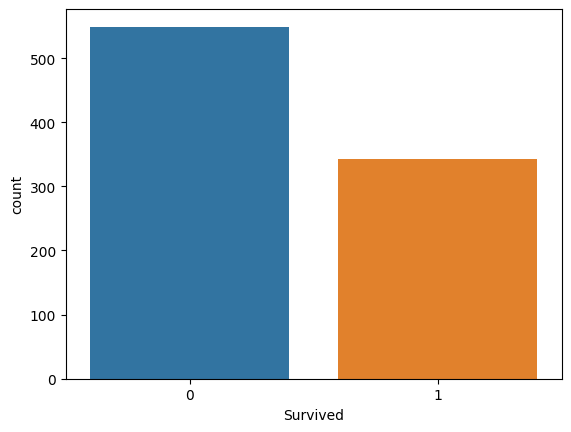

In [559]:
sns.countplot(x='Survived', data=titanic_train)

Observation- as we see the people who was not serviced is more i.e. 549 and the survived count is 342 . lets visualise this with exact count

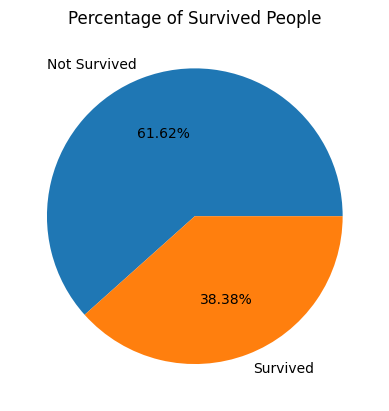

In [560]:
plt.pie(titanic_train['Survived'].value_counts(),labels=['Not Survived', 'Survived'], autopct='%1.2f%%')
plt.title('Percentage of Survived People')
plt.show()

Observation -Total 61.62% of people not survived only 

<Axes: xlabel='Pclass', ylabel='count'>

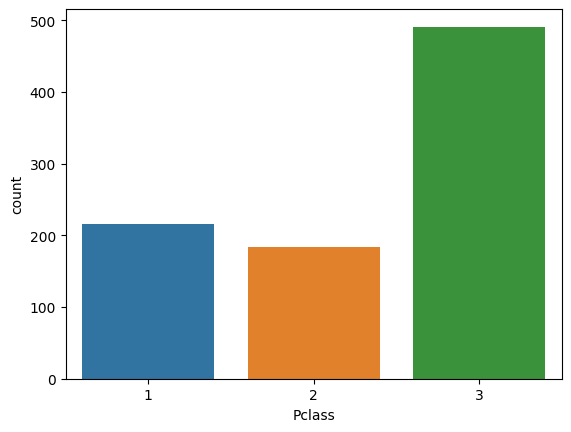

In [561]:
sns.countplot(x='Pclass', data=titanic_train)

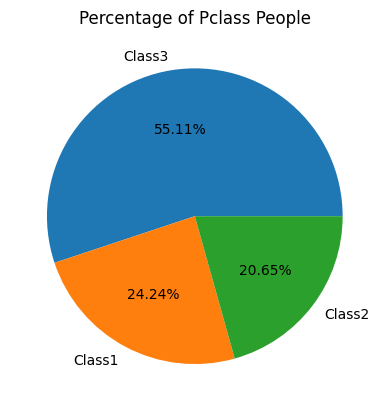

In [562]:
plt.pie(titanic_train['Pclass'].value_counts(),labels=['Class3', 'Class1', 'Class2'], autopct='%1.2f%%')
plt.title('Percentage of Pclass People')
plt.show()

In [563]:
titanic_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Observation - maxixmum 55.11% people travel in Pclass3 with count 491 total passenger

24.24% of people traveling in Class1 with total count 216 passenger

and only 184 people traveling in class2 i.e. only 20.65%


<Axes: xlabel='Sex', ylabel='count'>

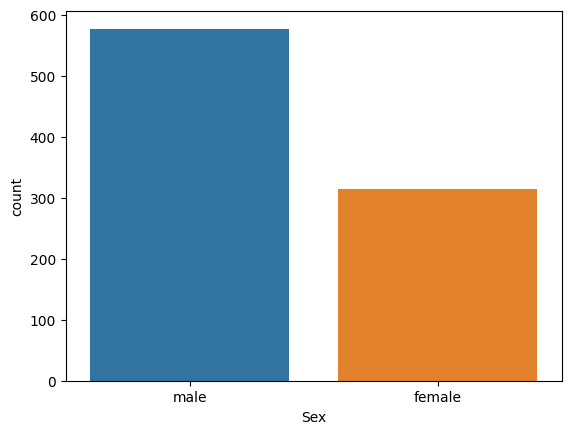

In [564]:
sns.countplot(x='Sex', data=titanic_train)

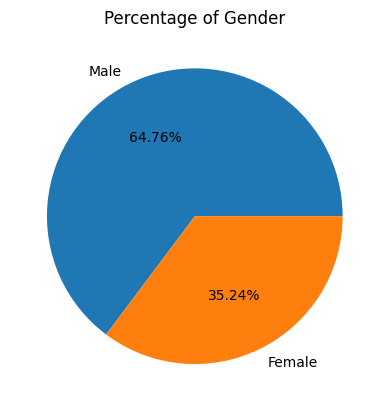

In [565]:
plt.pie(titanic_train['Sex'].value_counts(),labels=['Male', 'Female'], autopct='%1.2f%%')
plt.title('Percentage of Gender')
plt.show()

In [566]:
titanic_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Observation - Total 577 Male was traveling i.e.64.76% out of 100%, other 35.24% are Female with toal female count is 314

In [567]:
titanic_train['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

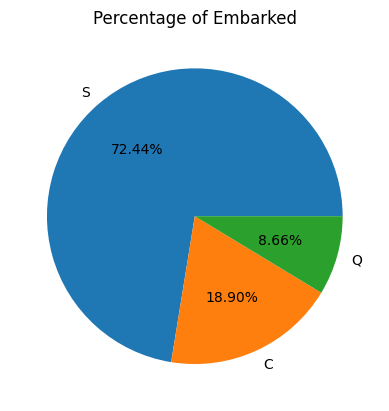

In [568]:
plt.pie(titanic_train['Embarked'].value_counts(),labels=['S', 'C','Q'], autopct='%1.2f%%')
plt.title('Percentage of Embarked')
plt.show()

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

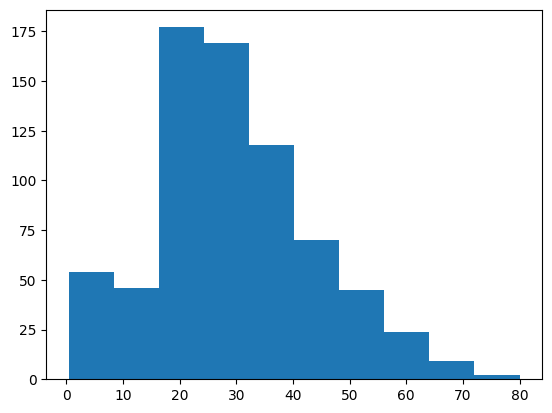

In [569]:
# Lets check with Numerical Data

plt.hist(titanic_train['Age'])

<Axes: xlabel='Age', ylabel='Density'>

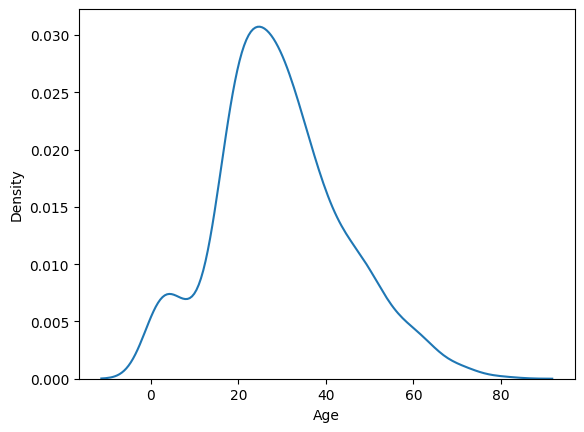

In [570]:
sns.kdeplot(data=titanic_train, x='Age')

<Axes: xlabel='Age'>

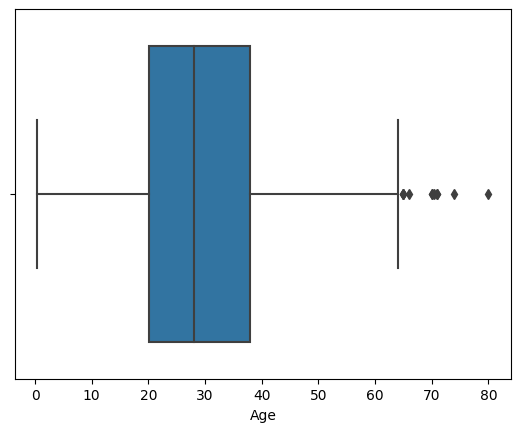

In [571]:
sns.boxplot(data=titanic_train, x='Age')

In [572]:
np.mean(titanic_train['Age'])

29.69911764705882

In [573]:
np.min(titanic_train['Age'])

0.42

In [574]:
np.max(titanic_train['Age'])

80.0

In [575]:
titanic_train['Age'].skew()

0.38910778230082704

So ab observe that in Age with having some outliers but having normally distributed

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

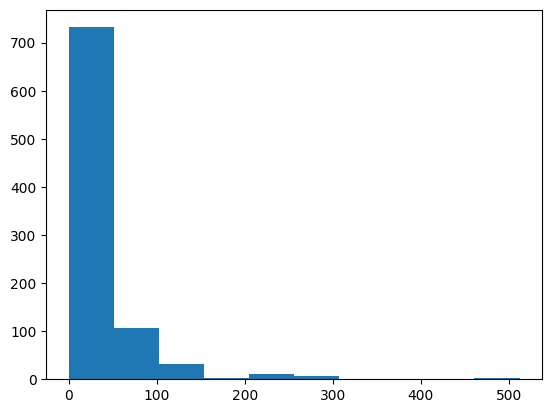

In [576]:
plt.hist(titanic_train['Fare'])

<Axes: xlabel='Fare', ylabel='Density'>

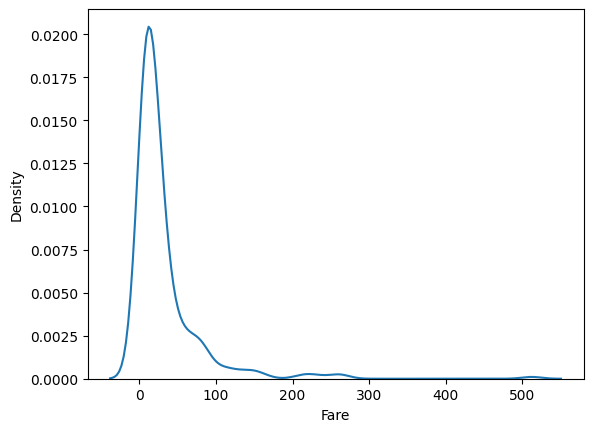

In [577]:
sns.kdeplot(titanic_train['Fare'])

<Axes: >

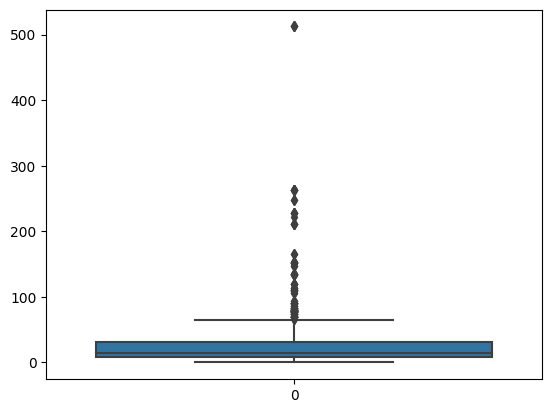

In [578]:
sns.boxplot(titanic_train['Fare'])

In [579]:
titanic_train['Fare'].min()

0.0

In [580]:
titanic_train['Fare'].max()

512.3292

In [581]:
# as we see 512 fare is max. and looking like as a outlier in the data. data of fare is normally distributed

## Lets Having Bivariate and Multivariate Analysis  to Analize the data

In [582]:
#its good to observe the data using pairplot

titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


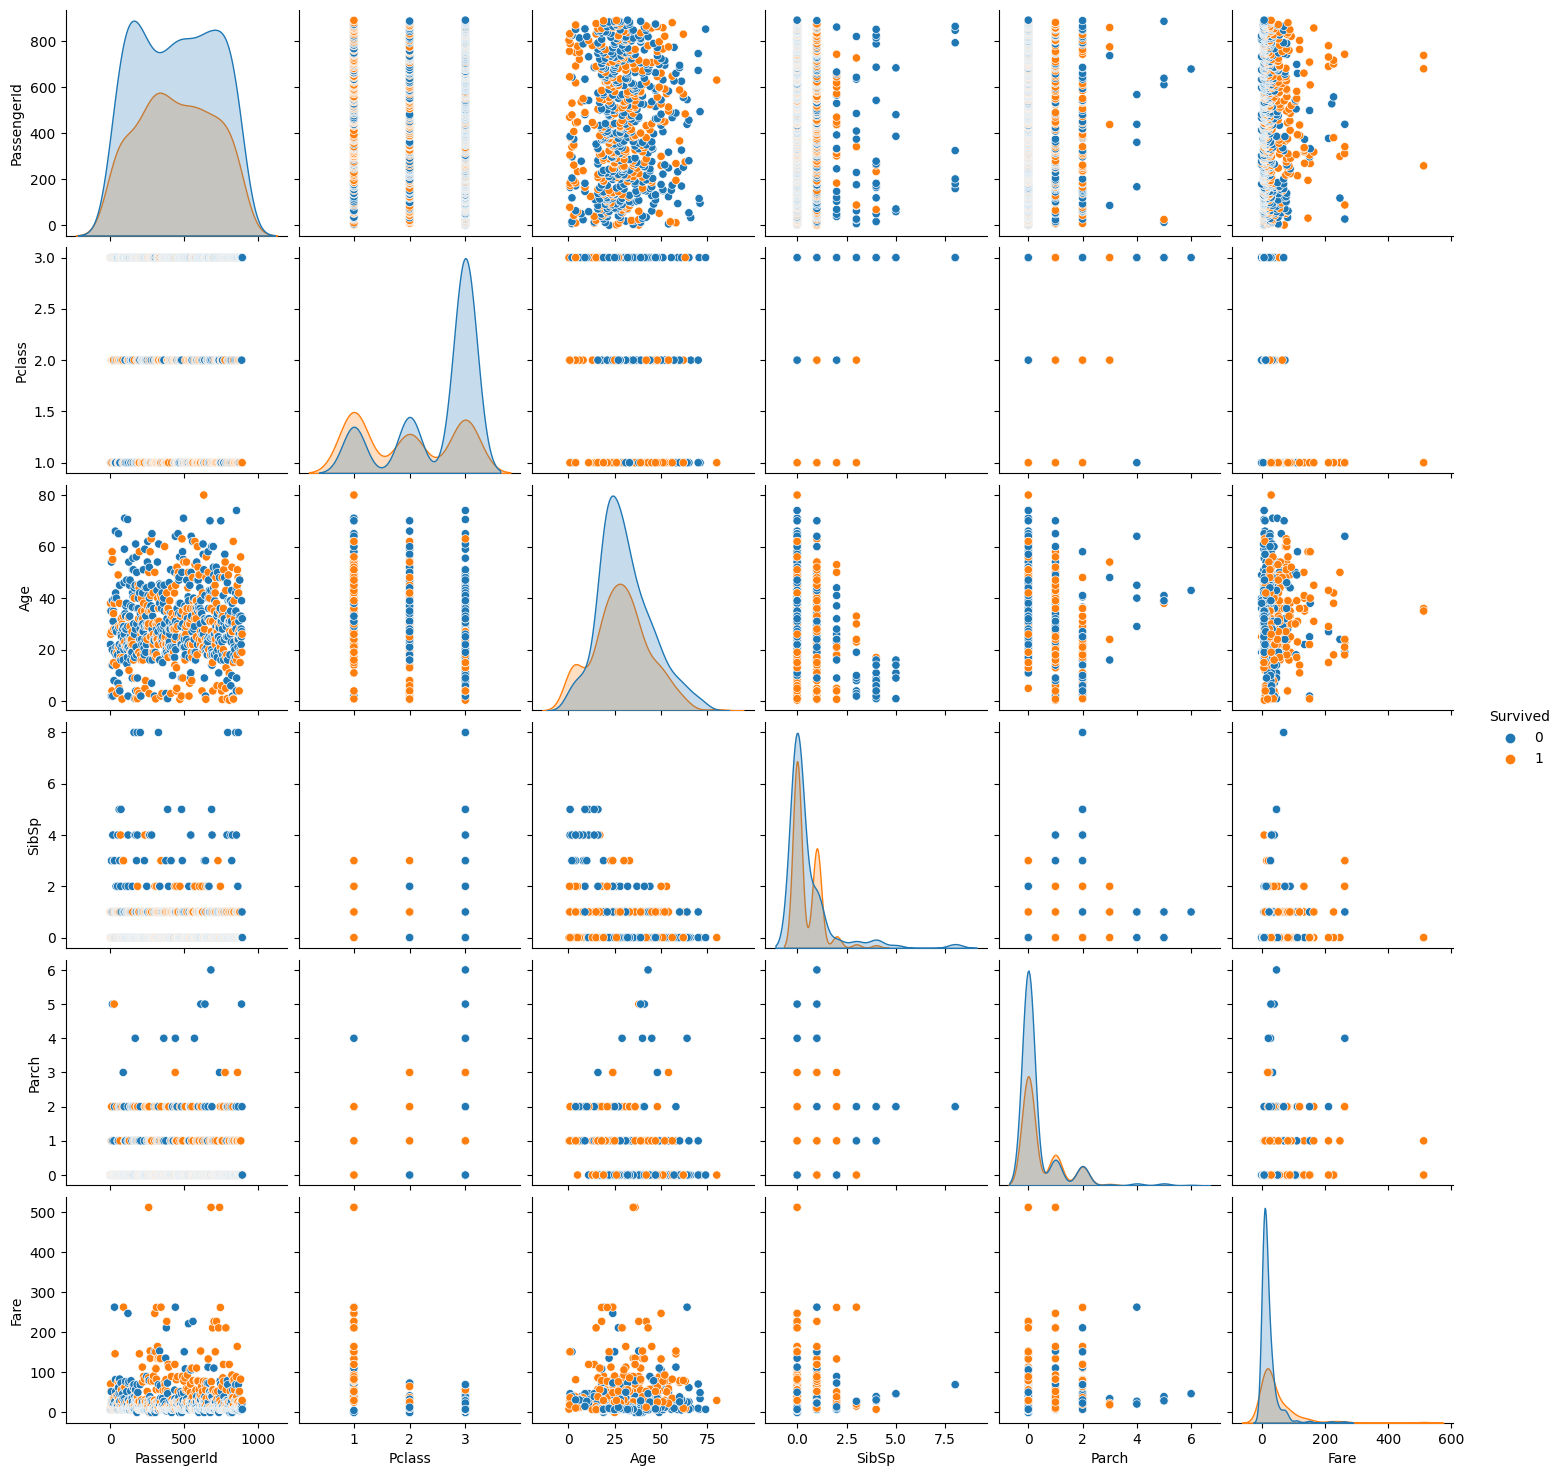

In [583]:
sns.pairplot(titanic_train, hue='Survived')

In [584]:
# check for missing value

titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [585]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [586]:
titanic_train['Age']=titanic_train['Age'].fillna(titanic_train['Age'].median())

In [587]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [588]:
titanic_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [589]:
titanic_train['Embarked'].mode()[0]

'S'

In [590]:
titanic_train['Embarked']=titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0])

In [591]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [592]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [593]:
# as we seen cabin has more missing values. lets drop the columns

In [594]:
titanic_train.drop(['Cabin'], axis=1, inplace=True)

In [595]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [596]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [597]:
titanic_train['Age']=titanic_train['Age'].astype(int)

In [598]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [599]:
titanic_train['Family']=titanic_train['SibSp']+titanic_train['Parch']+1

In [600]:
titanic_train.drop(['SibSp','Parch','Name','Ticket'],axis=1, inplace=True)

In [601]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   Family       891 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [602]:
titanic_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [603]:
titanic_train['Sex']=titanic_train['Sex'].map({'male':1, 'female':0}).astype(int)

In [604]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   Family       891 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 55.8+ KB


In [605]:
titanic_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [606]:
titanic_train = pd.get_dummies(titanic_train,columns=['Embarked'],dtype=int, drop_first=True)

In [607]:
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family,Embarked_Q,Embarked_S
0,1,0,3,1,22,7.2500,2,0,1
1,2,1,1,0,38,71.2833,2,0,0
2,3,1,3,0,26,7.9250,1,0,1
3,4,1,1,0,35,53.1000,2,0,1
4,5,0,3,1,35,8.0500,1,0,1


In [608]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Family       891 non-null    int64  
 7   Embarked_Q   891 non-null    int64  
 8   Embarked_S   891 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 62.8 KB


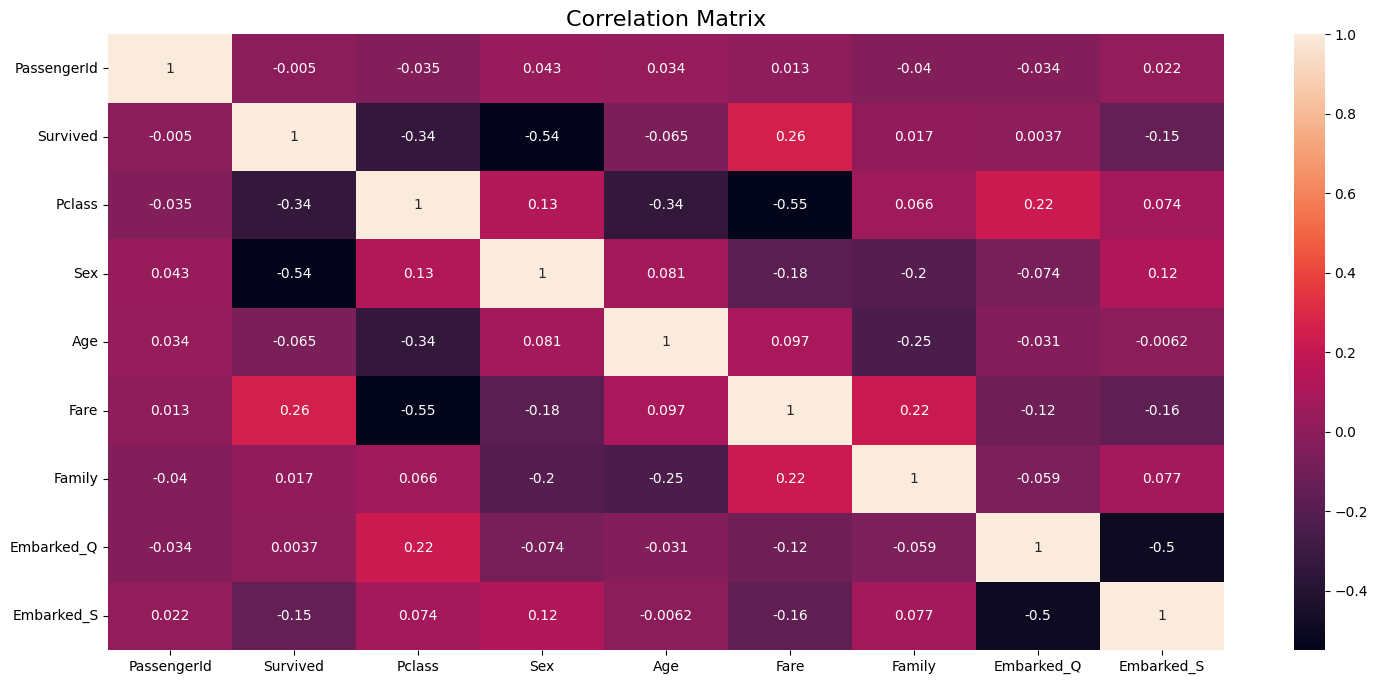

In [609]:
plt.figure(figsize=(18,8))
corr = titanic_train.corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()
     

In [610]:
y= titanic_train['Survived']

In [611]:
X= titanic_train.iloc[:,2:]

In [612]:
X

,Pclass,Sex,Age,Fare,Family,Embarked_Q,Embarked_S
0,3,1,22,7.2500,2,0,1
1,1,0,38,71.2833,2,0,0
2,3,0,26,7.9250,1,0,1
3,1,0,35,53.1000,2,0,1
4,3,1,35,8.0500,1,0,1
...,...,...,...,...,...,...,...
886,2,1,27,13.0000,1,0,1
887,1,0,19,30.0000,1,0,1
888,3,0,28,23.4500,4,0,1
889,1,1,26,30.0000,1,0,0


In [613]:
from sklearn.model_selection import train_test_split

In [614]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50,test_size=0.2 )

In [615]:
X_train.shape

(712, 7)

In [616]:
X_test.shape

(179, 7)

In [617]:
y_train.shape

(712,)

In [618]:
from sklearn.tree import DecisionTreeClassifier

In [619]:
classifier= DecisionTreeClassifier()

In [620]:
from sklearn.model_selection import GridSearchCV

In [621]:
# Define the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state':[2,5,14,19,20,25,30,35,40,45,50]
}


In [622]:
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')


In [623]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [2, 5, 14, 19, 20, 25, 30, 35, 40, 45,
                                          50]},
             scoring='accuracy')

In [624]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 5}


In [625]:
print(grid_search.best_score_)

0.8243573328080369


In [626]:
from sklearn.metrics import accuracy_score, classification_report

In [627]:
y_pred= grid_search.best_estimator_.predict(X_test)

In [628]:
print(accuracy_score(y_test,y_pred))

0.776536312849162


In [629]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       101
           1       0.90      0.55      0.68        78

    accuracy                           0.78       179
   macro avg       0.81      0.75      0.76       179
weighted avg       0.80      0.78      0.76       179



In [630]:
titanic_test =pd.read_csv('/kaggle/input/titanic/test.csv')

In [631]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [632]:
titanic_test['Age']=titanic_test['Age'].fillna(titanic_test['Age'].median())

In [633]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [634]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [635]:
titanic_test= titanic_test.drop(['Cabin'],axis=1)

In [636]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [637]:
titanic_test['Fare']=titanic_test['Fare'].fillna(titanic_test['Fare'].mode()[0])

In [638]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [639]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [640]:
titanic_test['Sex']=titanic_test['Sex'].map({'male':1, 'female':0}).astype(int)

In [641]:
titanic_test = pd.get_dummies(titanic_test,columns=['Embarked'],dtype=int, drop_first=True)

In [642]:
titanic_test['Family']=titanic_test['SibSp']+titanic_test['Parch']+1

In [643]:
titanic_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Family
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,1,2


In [644]:
titanic_test.drop(['SibSp','Parch','Name','Ticket'],axis=1, inplace=True)

In [645]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked_Q   418 non-null    int64  
 6   Embarked_S   418 non-null    int64  
 7   Family       418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [646]:
titanic_test['Age']=titanic_test['Age'].astype(int)

In [647]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Embarked_Q   418 non-null    int64  
 6   Embarked_S   418 non-null    int64  
 7   Family       418 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 26.2 KB


In [648]:
titanic_test1= titanic_test.iloc[:,1:]

In [649]:
titanic_test1.head()

,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,Family
0,3,1,34,7.8292,1,0,1
1,3,0,47,7.0000,0,1,2
2,2,1,62,9.6875,1,0,1
3,3,1,27,8.6625,0,1,1
4,3,0,22,12.2875,0,1,3


In [650]:
X.head(2)

,Pclass,Sex,Age,Fare,Family,Embarked_Q,Embarked_S
0,3,1,22,7.2500,2,0,1
1,1,0,38,71.2833,2,0,0


In [656]:
column_order = X.columns
#titanic_test1=titanic_test1.iloc[:,[0,1,2,3,4,6,5]]

In [657]:
column_order

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Family', 'Embarked_Q', 'Embarked_S'], dtype='object')

In [658]:
titanic_test1=titanic_test1[column_order]

In [659]:
titanic_test1.head()

,Pclass,Sex,Age,Fare,Family,Embarked_Q,Embarked_S
0,3,1,34,7.8292,1,1,0
1,3,0,47,7.0000,2,0,1
2,2,1,62,9.6875,1,1,0
3,3,1,27,8.6625,1,0,1
4,3,0,22,12.2875,3,0,1


In [660]:
prediction = grid_search.best_estimator_.predict(titanic_test1)



#sub.to_csv('submission.csv', index=False)
#sub.head(10)

In [661]:
final_submission = pd.DataFrame({'PassengerID':titanic_test['PassengerId'], 'Survived':prediction})

In [662]:
final_submission.to_csv('/kaggle/working/final_submission.csv',index=False)